In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [33]:
dataset = pd.read_csv("big_mart.csv")
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([322., 397., 337., 359., 338., 346., 273., 310., 274., 324., 272.,
        297., 286., 276., 246., 250., 198., 209., 196., 218., 198., 194.,
        181., 182., 156., 142., 128., 119., 121., 106.,  94.,  84.,  90.,
         88.,  84.,  74.,  68.,  53.,  52.,  42.,  65.,  42.,  40.,  41.,
         38.,  38.,  27.,  25.,  24.,  19.,  17.,  20.,  14.,  12.,  20.,
         10.,   9.,  11.,   6.,   5.,   6.,   4.,   7.,   2.,   6.,   1.,
          1.,   3.,   3.,   3.,   4.,   2.,   3.,   2.,   1.,   0.,   1.,
          0.,   3.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([   33.29    ,   163.826748,   294.363496,   424.900244,
          555.436992,   685.97374 ,   816.510488,   947.047236,
         1077.583984,  1208.120732,  1338.65748 ,  1469.194228,
         1599.730976,  1730.267724,  1860.804472,  1991.34122 ,
         2121.877968,  2252.414716,  2382.951464,  2513.488212,

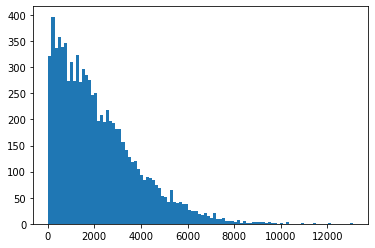

In [34]:
plt.hist(dataset.Item_Outlet_Sales, bins = 100)

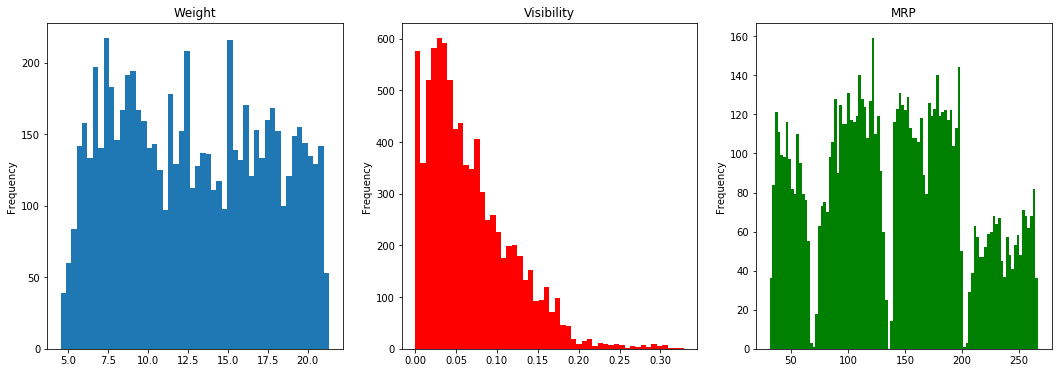

In [35]:
plt.figure(1)
plt.subplot(131)
dataset.Item_Weight.plot(kind='hist',bins=50,figsize=(18,6),title='Weight')
plt.subplot(132)
dataset.Item_Visibility.plot(kind='hist',bins=50,title='Visibility',color='r')
plt.subplot(133)
dataset.Item_MRP.plot(kind='hist',bins=100,title='MRP',color='g')

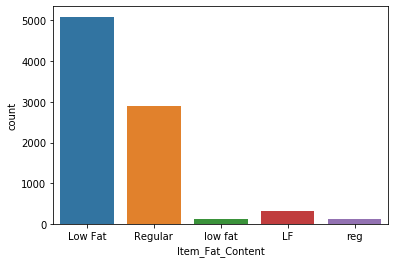

In [36]:
sns.countplot(dataset.Item_Fat_Content)

In [37]:
dataset["Item_Fat_Content"] = dataset["Item_Fat_Content"].replace("low fat", "Low Fat")
dataset["Item_Fat_Content"] = dataset["Item_Fat_Content"].replace("LF", "Low Fat")
dataset["Item_Fat_Content"] = dataset["Item_Fat_Content"].replace("reg", "Regular")

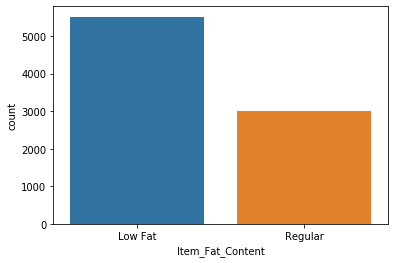

In [38]:
sns.countplot(dataset.Item_Fat_Content)

In [39]:
dataset['Item_Type_Combined'] = dataset['Item_Identifier'].apply(lambda x: x[0:2])
dataset['Item_Type_Combined'] = dataset['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})


In [40]:
dataset['Outlet_Years']=2018-dataset.Outlet_Establishment_Year
le=LabelEncoder()
dataset['Outlet']=le.fit_transform(dataset.Outlet_Identifier)
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i].astype(str))


In [41]:
dataset = pd.get_dummies(dataset, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [43]:
dataset.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)